# Leading Causes of Death in NYC
By Yiru Luo

## Introduction

### Dataset

I am using the New York City Leading Causes of Death Dataset from NYC Open Data. The dataset contains 2,102 rows: the cause of death, the decedent's sex, ethnicity, the number of people who died due to cause of death, death rate, and adjusted age. The data is across years.

Dataset(s) to be used:[https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/about_data]

### Analysis question: 
1. How does the age adjusted death rate change over the years in NYC?
2. How has the leading causes of death change over the years in NYC?
   - Does this vary among different ethnicity in NYC?
3. How does the leading causes of death vary between genders in NYC?

### Columns that will (likely) be used:

Year
Leading Cause
Sex
Race Ethnicity
Deaths
Age Adjusted Death Rate


### Hypothesis: 

I hypothesize that the leading causes of death in New York City have shifted over the years, with some causes, such as heart disease, declining, while others, such as chronic conditions or drug-related deaths, have increased. These changes are likely not uniform across demographics. Different ethnic groups may exhibit distinct patterns in leading causes of death, with certain causes being more prevalent in specific groups. Similarly, there may be gender-based differences, with some causes, such as accidents, being more common among men, while chronic conditions may be more prevalent among women. Additionally, while death rates for leading causes may have generally decreased over time, the rate of decline is likely uneven, with some ethnic and gender groups experiencing faster improvements than others.

Site URL: [the *.readthedocs.io URL of your live site, from the Publish section]

# Coding Zone

## STEP 1: Import the necesary packages

In [78]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [80]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## STEP 2: Import and clean the data as necessary

In [83]:
# importing data
leadingdeath = pd.read_csv("New_York_City_Leading_Causes_of_Death.csv")
leadingdeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     2102 non-null   int64 
 1   Leading Cause            2102 non-null   object
 2   Sex                      2102 non-null   object
 3   Race Ethnicity           2102 non-null   object
 4   Deaths                   2102 non-null   object
 5   Death Rate               1759 non-null   object
 6   Age Adjusted Death Rate  1759 non-null   object
dtypes: int64(1), object(6)
memory usage: 115.1+ KB


In [85]:
leadingdeath.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6


In [87]:
# Convert deaths, death rate and age adjusted death rate to numeric values for easier calculation and analysis
leadingdeath["Deaths"] = pd.to_numeric(leadingdeath["Deaths"], errors="coerce")
leadingdeath["Death Rate"] = pd.to_numeric(leadingdeath["Death Rate"], errors="coerce")
leadingdeath["Age Adjusted Death Rate"] = pd.to_numeric(leadingdeath["Age Adjusted Death Rate"], errors="coerce")

In [89]:
sorted(leadingdeath['Race Ethnicity'].unique())

['Asian and Pacific Islander',
 'Black Non-Hispanic',
 'Hispanic',
 'Non-Hispanic Black',
 'Non-Hispanic White',
 'Not Stated/Unknown',
 'Other Race/ Ethnicity',
 'White Non-Hispanic']

In [91]:
sorted(leadingdeath['Sex'].unique())

['F', 'Female', 'M', 'Male']

In [93]:
# Standardize the Sex column
leadingdeath["Sex"] = leadingdeath["Sex"].replace({
    "F": "Female",
    "M": "Male",
    "female": "Female",
    "male": "Male"
})

In [95]:
sorted(leadingdeath['Sex'].unique())

['Female', 'Male']

In [97]:
#From this we can see there are many detailed categories that can be combined to a broder category
sorted(leadingdeath['Leading Cause'].unique())

['Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
 'All Other Causes',
 "Alzheimer's Disease (G30)",
 'Anemias (D50-D64)',
 'Aortic Aneurysm and Dissection (I71)',
 'Assault (Homicide: U01-U02, Y87.1, X85-Y09)',
 'Assault (Homicide: Y87.1, X85-Y09)',
 'Atherosclerosis (I70)',
 'Cerebrovascular Disease (Stroke: I60-I69)',
 'Certain Conditions Originating in the Perinatal Period (P00-P96)',
 'Certain Conditions originating in the Perinatal Period (P00-P96)',
 'Cholelithiasis and Disorders of Gallbladder (K80-K82)',
 'Chronic Liver Disease and Cirrhosis (K70, K73)',
 'Chronic Liver Disease and Cirrhosis (K70, K73-K74)',
 'Chronic Liver Diseases and Cirrhosis',
 'Chronic Lower Respiratory Diseases (J40-J47)',
 'Complications of Medical and Surgical Care (Y40-Y84, Y88)',
 'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
 'Covid-19',
 'Diabetes Mellitus (E10-E14)',
 'Dise

In [99]:
# Replace the detailed leading cause with broader categories for easier grouping and analysis
grouping_keywords = {
    "Accidents Except Drug Poisoning": "Accidents Except Drug Poisoning",
    "Assault": "Assault (Homicide)",
    "Diabetes Mellitus": "Diabetes Mellitus",
    "Diseases of Heart": "Diseases of Heart",
    "Intentional Self-Harm": "Intentional Self-Harm (Suicide)",
    "Chronic Liver Disease and Cirrhosis": "Chronic Liver Disease and Cirrhosis",
    "Mental and Behavioral Disorders": "Mental and Behavioral Disorders",
    "Covid-19": "Covid-19",
    "Malignant Neoplasms": "Malignant Neoplasms (Cancer)",
    "Influenza and Pneumonia": "Influenza and Pneumonia",
    "Septicemia": "Septicemia",
    "Congenital Malformations": "Congenital Malformations",
    "Cerebrovascular Disease": "Cerebrovascular Disease (Stroke)",
    "Atherosclerosis": "Atherosclerosis",
    "Essential Hypertension and Renal Diseases": "Essential Hypertension and Renal Diseases",
    "Human Immunodeficiency Virus Disease": "HIV (Human Immunodeficiency Virus Disease)",
    "Peptic Ulcer": "Peptic Ulcer",
    "Parkinson's Disease": "Parkinson's Disease",
    "Nephritis": "Nephritis and Related Diseases",
    "Tuberculosis": "Tuberculosis",
    "All Other Causes": "Other Causes",
}

# Function to map categories based on the dictionary
def map_category(cause):
    for keyword, group in grouping_keywords.items():
        if keyword in cause:
            return group
    return "Other Causes"  # Default for unmatched categories

# Apply mapping to the `Leading Cause` column
leadingdeath["Leading Cause"] = leadingdeath["Leading Cause"].apply(map_category)

leadingdeath

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Nephritis and Related Diseases,Female,Black Non-Hispanic,83.0,7.9,6.9
1,2009,HIV (Human Immunodeficiency Virus Disease),Female,Hispanic,96.0,8.0,8.1
2,2009,Other Causes,Female,Hispanic,155.0,12.9,16.0
3,2008,Diseases of Heart,Female,Hispanic,1445.0,122.3,160.7
4,2009,Other Causes,Female,Asian and Pacific Islander,14.0,2.5,3.6
...,...,...,...,...,...,...,...
2097,2021,Essential Hypertension and Renal Diseases,Female,Not Stated/Unknown,10.0,NaN,NaN
2098,2021,Other Causes,Female,Not Stated/Unknown,7.0,NaN,NaN
2099,2021,Diabetes Mellitus,Female,Not Stated/Unknown,7.0,NaN,NaN
2100,2021,Other Causes,Female,Not Stated/Unknown,7.0,NaN,NaN


In [101]:
#now we know the data time range is from 2007 to 2021
sorted(leadingdeath['Year'].unique())

[2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [103]:
#Remove rows with missing critical data (Deaths, Death Rate, Age Adjusted Death Rate)
leadingdeath.dropna(subset = ['Deaths', 'Death Rate', 'Age Adjusted Death Rate'], inplace = True)   
leadingdeath.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Nephritis and Related Diseases,Female,Black Non-Hispanic,83.0,7.9,6.9
1,2009,HIV (Human Immunodeficiency Virus Disease),Female,Hispanic,96.0,8.0,8.1
2,2009,Other Causes,Female,Hispanic,155.0,12.9,16.0
3,2008,Diseases of Heart,Female,Hispanic,1445.0,122.3,160.7
4,2009,Other Causes,Female,Asian and Pacific Islander,14.0,2.5,3.6


In [105]:
# Logical checks and cleaning
leadingdeath = leadingdeath[(leadingdeath["Deaths"] >= 0) & (leadingdeath["Age Adjusted Death Rate"] <= 1000)]
leadingdeath = leadingdeath[~leadingdeath["Race Ethnicity"].isin(["Not Stated/Unknown"])]
leadingdeath = leadingdeath[~leadingdeath["Sex"].isin(["Unknown"])]

## STEP 3: Data Analysis of Q1

How has the leading causes of death change over the years in NYC?
Does this vary among different ethnicity in NYC?

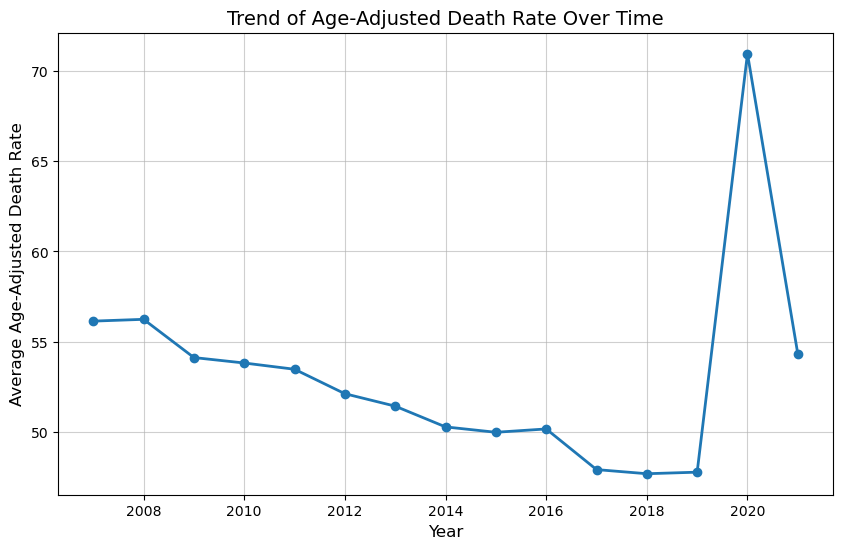

In [108]:
# Determine figure size based on the number of unique years
num_years = leadingdeath['Year'].nunique()
fig_width = max(10, num_years * 0.5)  # Adjust width dynamically based on data
fig_height = 6

plt.figure(figsize=(fig_width, fig_height))
yearly_rate = leadingdeath.groupby("Year")["Age Adjusted Death Rate"].mean()
plt.plot(yearly_rate.index, yearly_rate.values, marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Trend of Age-Adjusted Death Rate Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Age-Adjusted Death Rate', fontsize=12)
plt.grid(alpha=0.6)
plt.show()


In [110]:
# Group by Year and Leading Cause 
grouped_year_cause = leadingdeath.groupby(["Year", "Leading Cause"], as_index=False)["Deaths"].sum()

# Pivot the data for easier plotting
pivot_year_cause = grouped_year_cause.pivot(index="Year", columns="Leading Cause", values="Deaths").fillna(0)

pivot_year_cause.head(50)

Leading Cause,Accidents Except Drug Poisoning,Assault (Homicide),Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Congenital Malformations,Covid-19,Diabetes Mellitus,Diseases of Heart,Essential Hypertension and Renal Diseases,HIV (Human Immunodeficiency Virus Disease),Intentional Self-Harm (Suicide),Malignant Neoplasms (Cancer),Mental and Behavioral Disorders,Nephritis and Related Diseases,Other Causes,Parkinson's Disease,Septicemia
Year,,,,,,,,,,,,,,,,,
2007,0.0,381.0,1547.0,125.0,0.0,0.0,1535.0,21194.0,706.0,952.0,245.0,13102.0,694.0,102.0,12675.0,0.0,138.0
2008,0.0,286.0,1486.0,212.0,14.0,0.0,1619.0,20918.0,809.0,918.0,251.0,12890.0,485.0,98.0,13451.0,0.0,0.0
2009,0.0,255.0,1432.0,136.0,0.0,0.0,1678.0,19801.0,849.0,829.0,243.0,13055.0,498.0,75.0,13347.0,0.0,0.0
2010,0.0,299.0,1568.0,168.0,0.0,0.0,1687.0,17685.0,960.0,717.0,245.0,13196.0,349.0,86.0,14857.0,0.0,107.0
2011,0.0,266.0,1740.0,167.0,0.0,0.0,1735.0,16722.0,886.0,653.0,247.0,13331.0,678.0,83.0,15683.0,0.0,0.0
2012,0.0,235.0,1612.0,217.0,0.0,0.0,1776.0,16469.0,888.0,462.0,272.0,13249.0,445.0,98.0,15798.0,0.0,113.0
2013,0.0,174.0,1669.0,178.0,0.0,0.0,1782.0,16389.0,936.0,433.0,245.0,13090.0,537.0,93.0,16448.0,0.0,151.0
2014,0.0,186.0,1754.0,261.0,0.0,0.0,1752.0,16176.0,862.0,390.0,282.0,13138.0,505.0,118.0,16313.0,0.0,118.0
2015,819.0,196.0,1811.0,166.0,0.0,0.0,1799.0,16765.0,1078.0,277.0,256.0,13096.0,836.0,79.0,15671.0,30.0,127.0


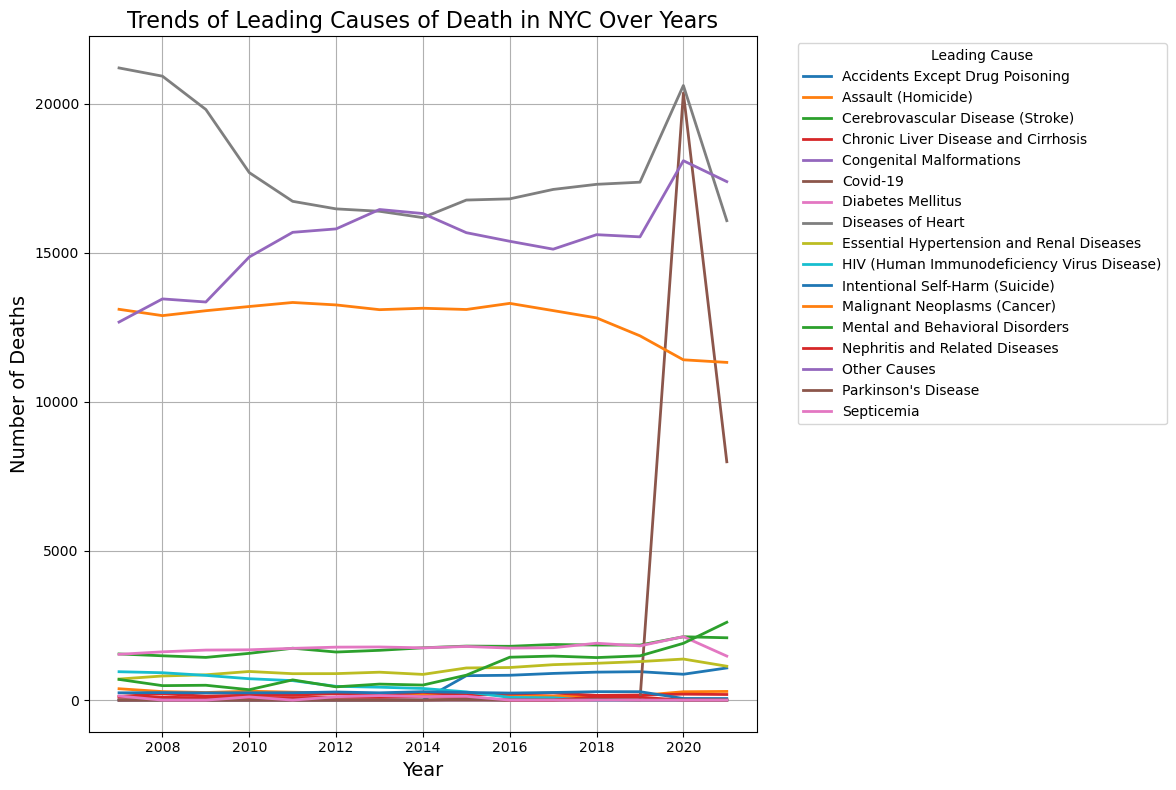

In [112]:
# Plot Overall Trends
plt.figure(figsize=(12, 8))
pivot_year_cause.plot(ax=plt.gca(), linewidth=2)
plt.title("Trends of Leading Causes of Death in NYC Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)
plt.legend(title="Leading Cause", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
# Group by Year, Leading Cause, and Ethnicity
grouped_ethnicity = leadingdeath.groupby(["Year", "Leading Cause", "Race Ethnicity"], as_index=False)["Deaths"].sum()

# Filter top causes for better visualization (optional)
top_causes = grouped_year_cause.groupby("Leading Cause")["Deaths"].sum().nlargest(5).index.tolist()
grouped_ethnicity = grouped_ethnicity[grouped_ethnicity["Leading Cause"].isin(top_causes)]

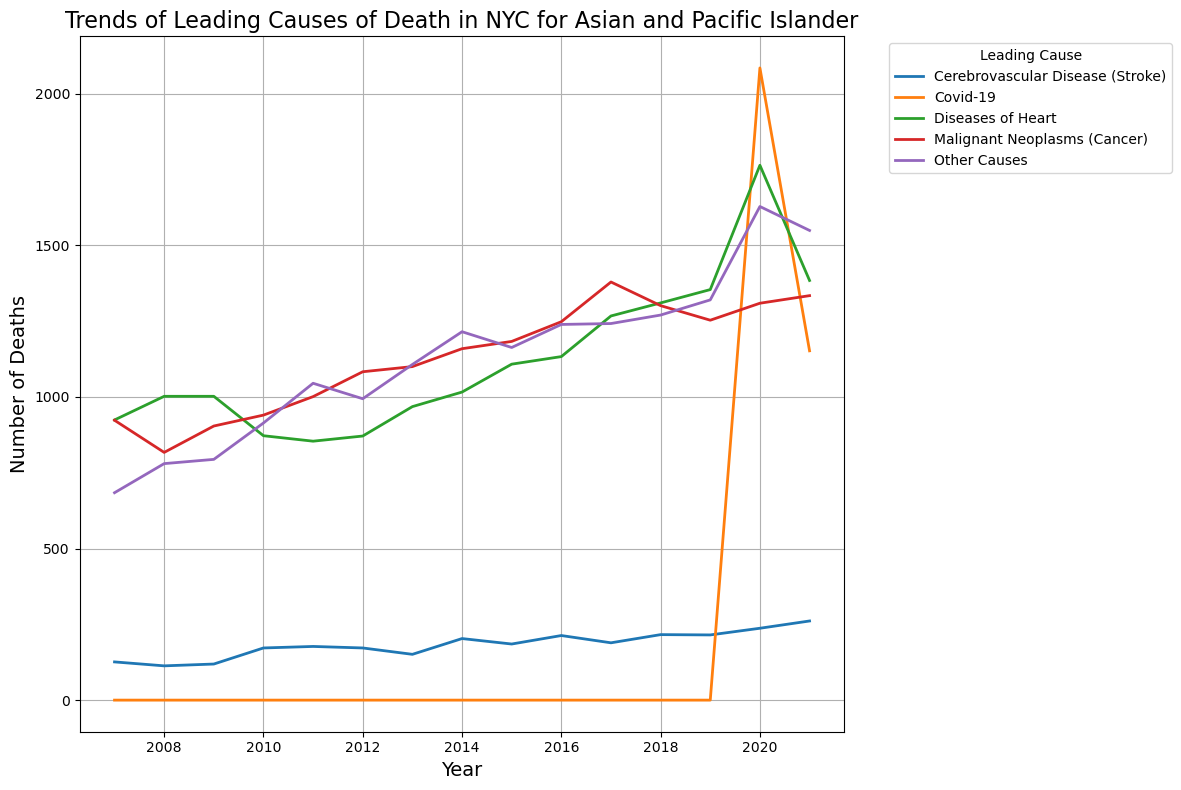

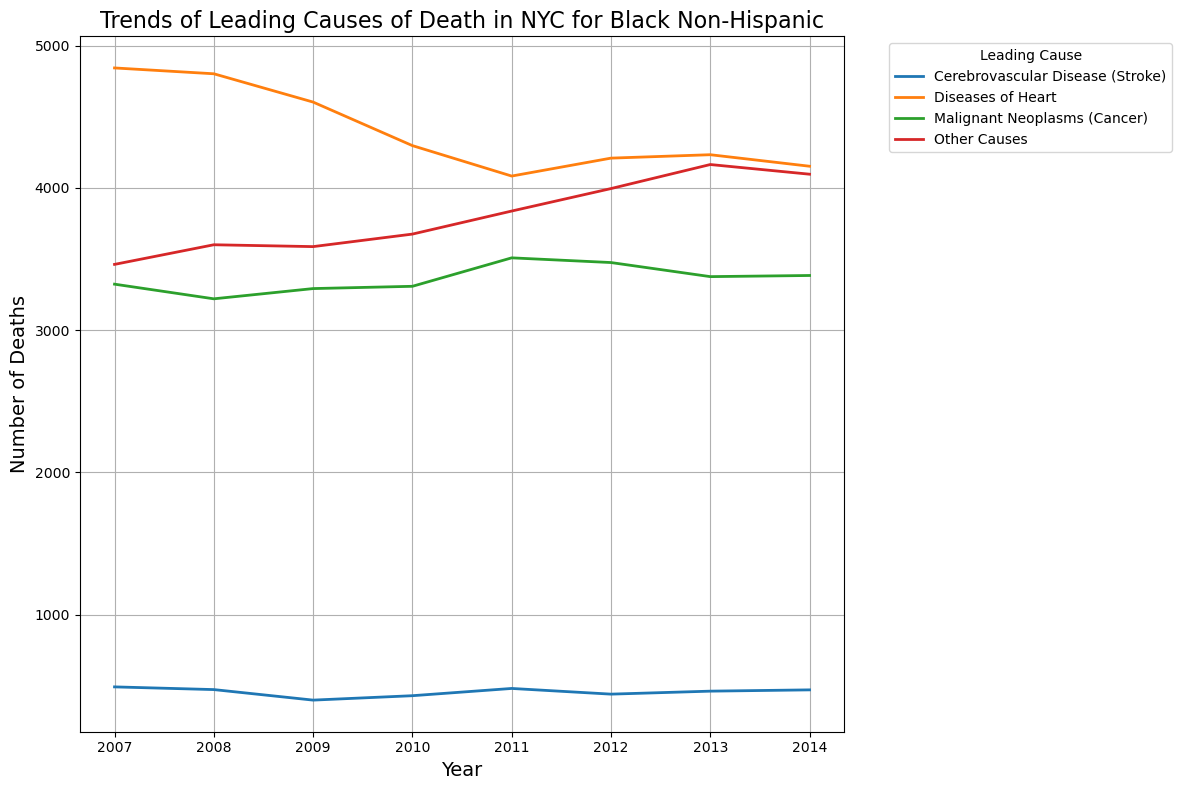

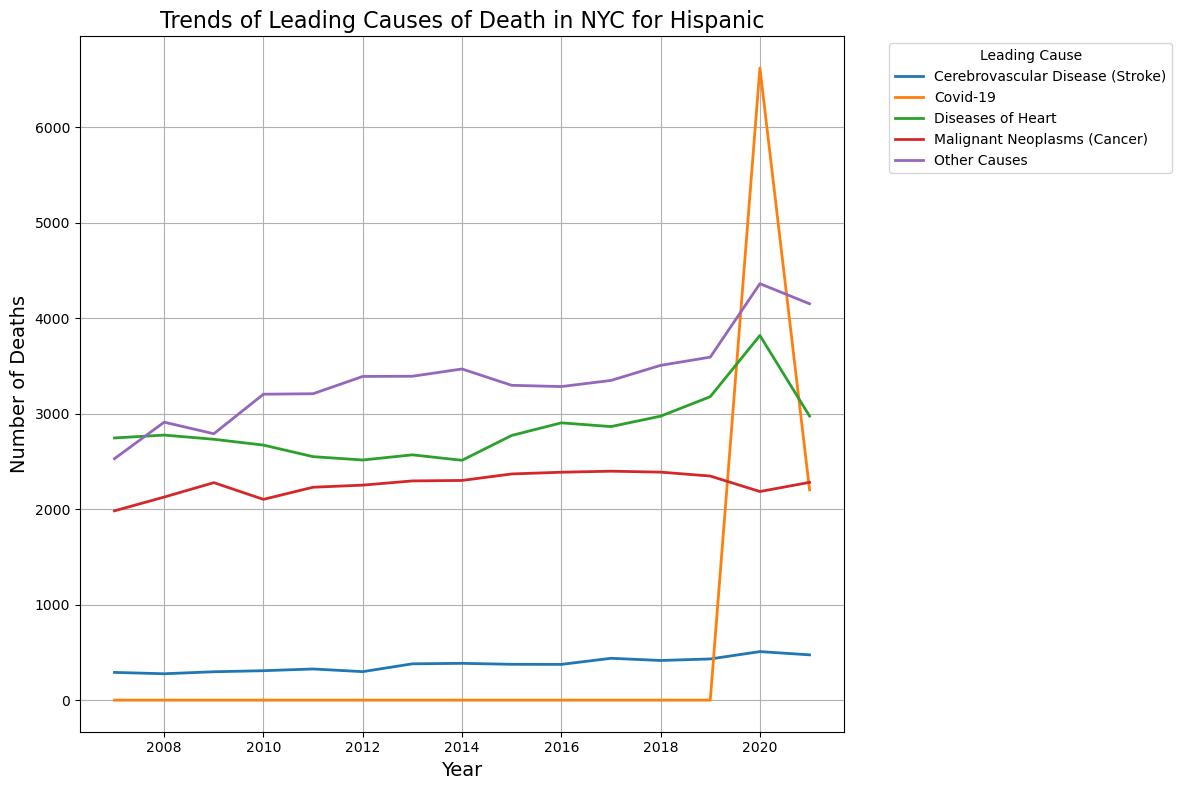

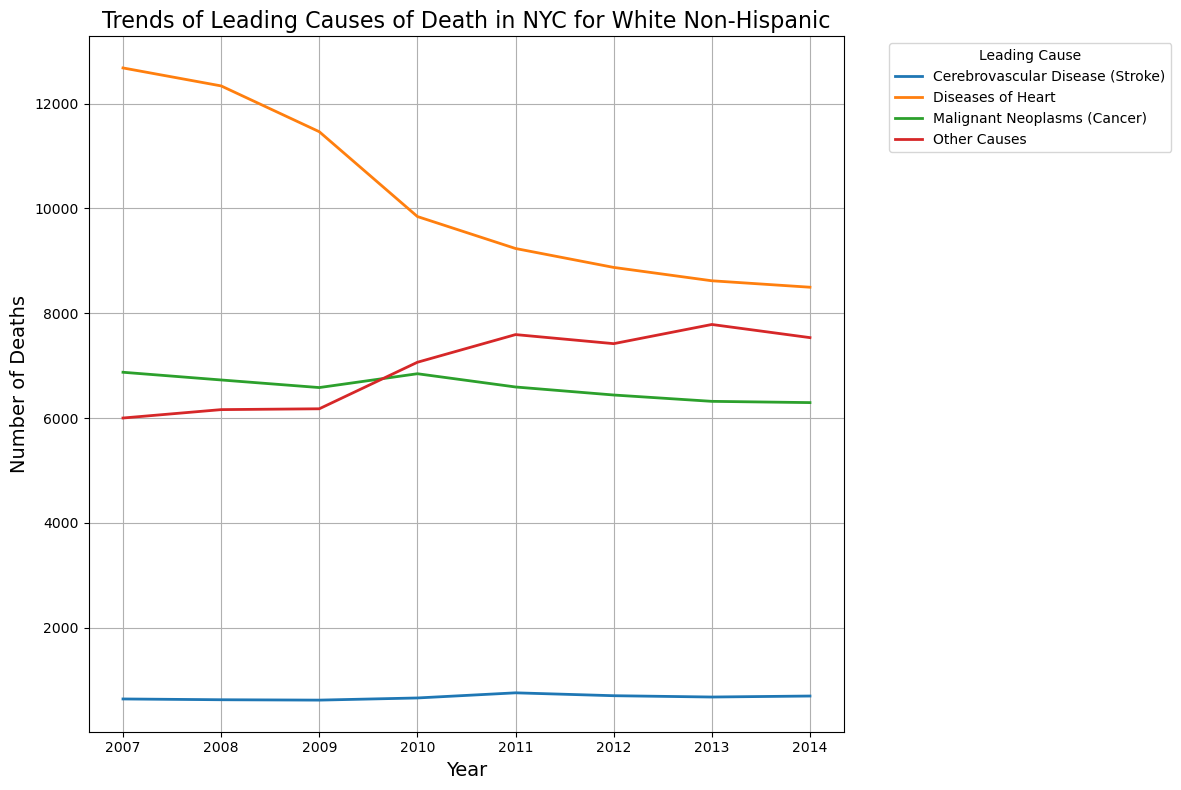

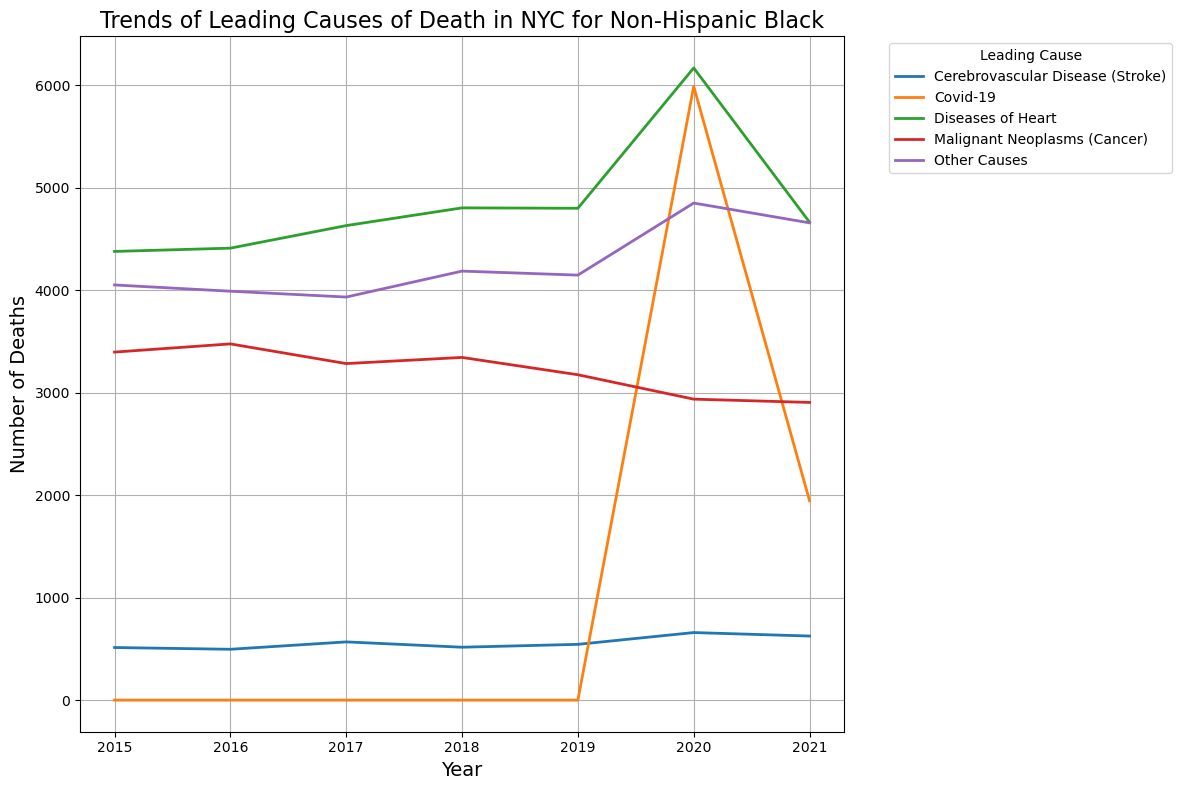

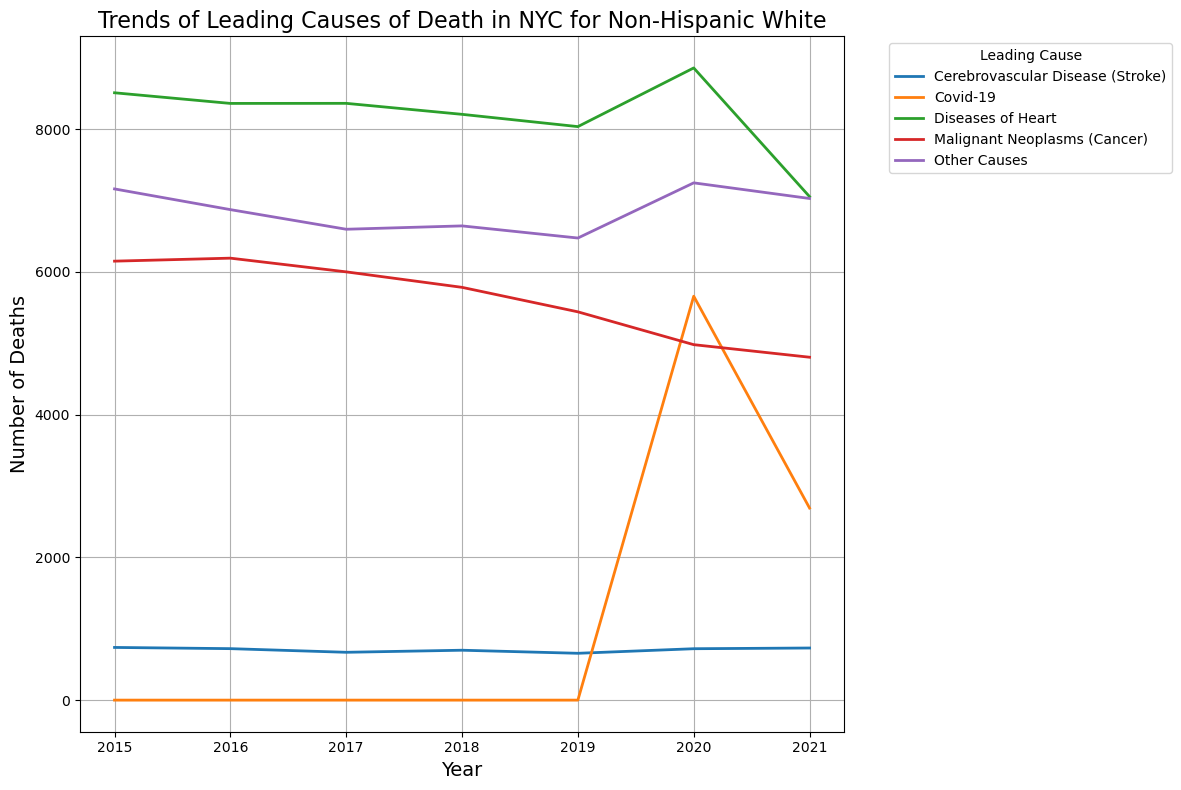

In [116]:
# Step 4: Plot Trends by Ethnicity
for ethnicity in grouped_ethnicity["Race Ethnicity"].unique():
    ethnicity_data = grouped_ethnicity[grouped_ethnicity["Race Ethnicity"] == ethnicity]
    pivot_ethnicity = ethnicity_data.pivot(index="Year", columns="Leading Cause", values="Deaths").fillna(0)

    plt.figure(figsize=(12, 8))
    pivot_ethnicity.plot(ax=plt.gca(), linewidth=2)
    plt.title(f"Trends of Leading Causes of Death in NYC for {ethnicity}", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Number of Deaths", fontsize=14)
    plt.legend(title="Leading Cause", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

How does the leading causes of death vary between genders in NYC?

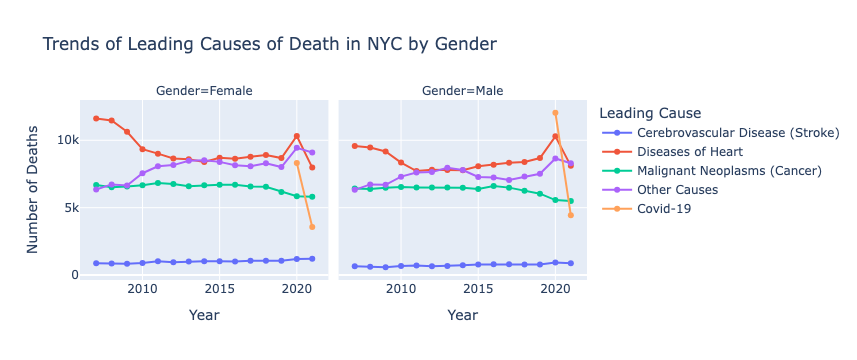

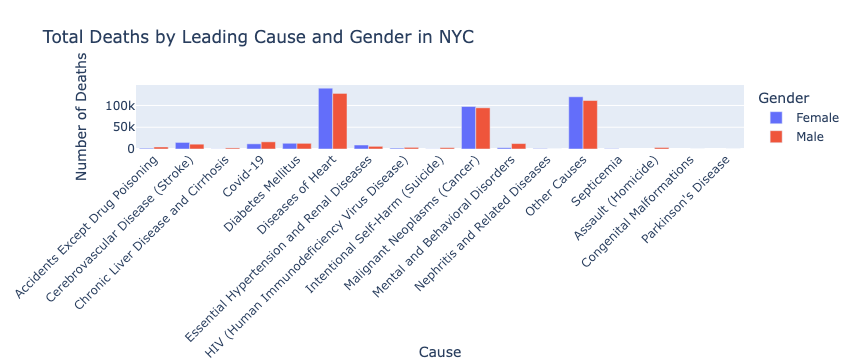

In [119]:
### Group Data by Year, Leading Cause, and Gender ###
grouped_gender = leadingdeath.groupby(["Year", "Leading Cause", "Sex"], as_index=False)["Deaths"].sum()

### Plot Trends for Leading Causes by Gender ###
top_causes = grouped_gender.groupby("Leading Cause")["Deaths"].sum().nlargest(5).index.tolist()
filtered_df = grouped_gender[grouped_gender["Leading Cause"].isin(top_causes)]

# Line chart for trends
fig = px.line(
    filtered_df,
    x="Year",
    y="Deaths",
    color="Leading Cause",
    facet_col="Sex",  # Separate plots for Male and Female
    title="Trends of Leading Causes of Death in NYC by Gender",
    labels={"Deaths": "Number of Deaths", "Year": "Year", "Sex": "Gender"},
    markers=True,
)
fig.update_layout(legend_title="Leading Cause")
fig.show()

### Total Deaths by Gender for Each Cause ###
total_by_gender = leadingdeath.groupby(["Leading Cause", "Sex"], as_index=False)["Deaths"].sum()

# Bar chart for total deaths
fig = px.bar(
    total_by_gender,
    x="Leading Cause",
    y="Deaths",
    color="Sex",
    title="Total Deaths by Leading Cause and Gender in NYC",
    labels={"Deaths": "Number of Deaths", "Sex": "Gender", "Leading Cause": "Cause"},
    barmode="group",
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Conclusion

### Q1:
The overall trend of age adjusted death rate declined from 2007 to 2019 due to development in healthcare, but peaked in 2020 due to Covid-19 Pandemic.

### Q2:
The trends in leading causes of death in NYC reveal that heart disease has consistently remained the top cause of death over the years, reflecting its critical impact on public health. Cancer has also remained a major contributor, showing a steady but slightly declining trend, while certain causes, such as diabetes, have seen slight declines, possibly due to advancements in treatment and prevention. The sharp spike in deaths in 2020 is clearly attributed to the COVID-19 pandemic, which temporarily overtook other causes as the leading cause of death during its peak year. Meanwhile, other causes, such as mental and behavioral disorders, chronic liver disease, and intentional self-harm, have shown relatively stable trends over the years with lower death rates compared to major causes like heart disease and cancer. Minor causes, such as Parkinson’s disease and congenital malformations, continue to have relatively low and stable death rates. These trends highlight the ongoing need for public health efforts to address heart disease and cancer while maintaining preparedness for pandemic-related challenges. Further analysis of demographic disparities could provide additional insights for targeted interventions.

In terms of differentiation among different ethnicities, we can see that heart disease, cancer and stroke remain to be top five reasons of leading cause of deaths for each ethnicity. However, it is interesting that we don't see the spike of Covid 19 in both Black non-Hispanic and White non-Hispanic ethnicities. My guess is that the death counts in the Black community might not be recorded due to lack of access in the hospital and the death counts of the White community might be actually low due to better access to healthcare and insurance. This needs more details to investigate the true reason.

### Q3:
The analysis of leading causes of death by gender in NYC reveals notable trends and variations. Heart disease remains the leading cause of death for both males and females, though the number of deaths is consistently higher among males. Cancer ranks as the second most significant cause for both genders, with a similar gender disparity. COVID-19 caused a sharp spike in deaths in 2020, impacting both genders significantly, but its effect was more pronounced among males. Additionally, cerebrovascular diseases, while less prevalent, exhibit relatively consistent death rates over time for both genders. The bar chart further highlights the overall gender differences, with males experiencing higher death rates across most leading causes, underscoring the need for targeted public health interventions to address these disparities.
